# Challenge 3

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
tipos=titanic.dtypes
tipos

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
flotante=titanic.select_dtypes(float).columns
categorico=titanic.select_dtypes(object).columns
columnas=titanic.columns
entero=[]
for i in columnas:
    if (i not in flotante) and (i not in categorico):
        entero.append(i)
print(f'Las variables numéricas son de dos tipos, flotantes:{flotante} y enteros:{entero}')
        

Las variables numéricas son de dos tipos, flotantes:Index(['Survived', 'Age', 'Fare'], dtype='object') y enteros:['PassengerId', 'Pclass', 'SibSp', 'Parch']


In [5]:
#your code here- categorical variable
titanic.select_dtypes(object).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12, 6]

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

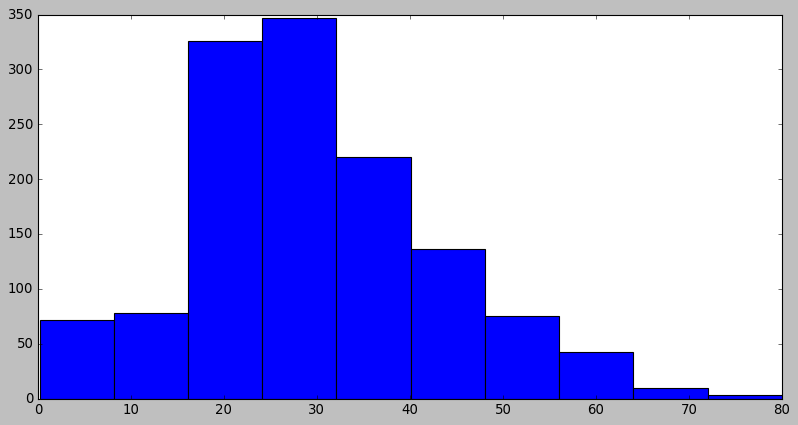

In [7]:
# your code here
plt.hist(titanic['Age'])

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

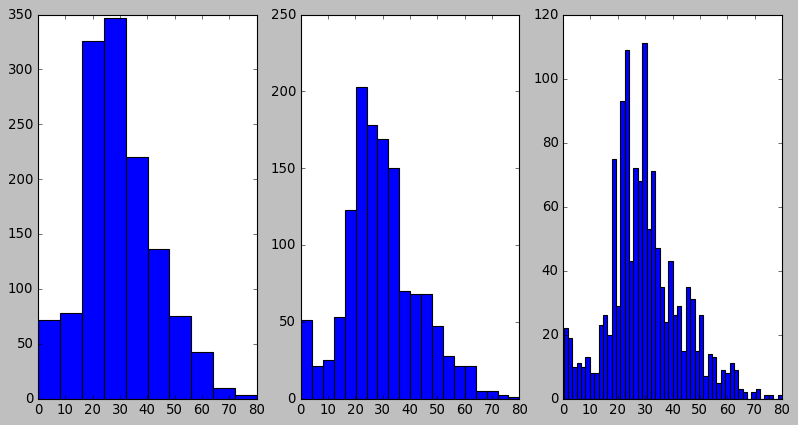

In [8]:
# your code here
fig,(x1,x2,x3)=plt.subplots(1,3)
x1.hist(titanic['Age'],bins=10)
x2.hist(titanic['Age'],bins=20)
x3.hist(titanic['Age'],bins=50)

#### Whether the bin size affects your plot? Why?

In [9]:
#your comment here: la distribución de la variabe edad no cambia por el tamaño de las agrupaciones que se hagan. La gráfica varía un poco por la cantidad de barras que aparecen según el tamaño de las agrupaciones, mientras más barras mayor detalle de la distribución, pero los valores de media, rangos, etc. no cambian. 

#### Use seaborn to show the distribution of the column `Age`

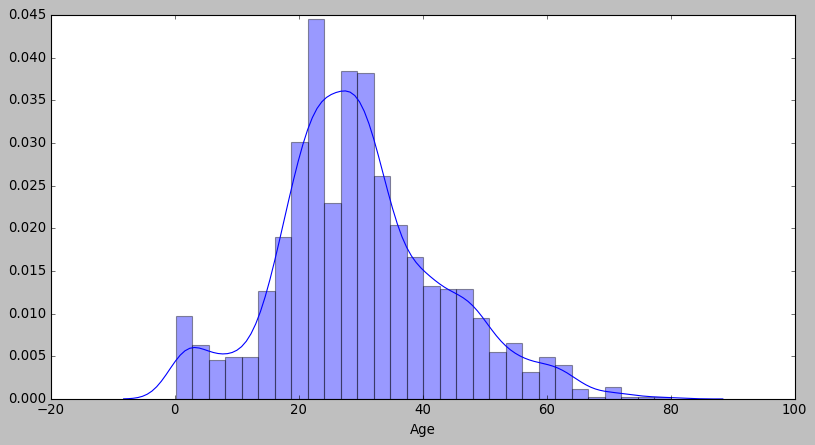

In [10]:
# your code here
sns.distplot(titanic.Age)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

([<matplotlib.patches.Wedge at 0x1ee2fcdd130>,
 [Text(-0.9893457860868154, -0.48082732404914486, 'Male'),
  Text(1.0792863612055794, 0.5245387979126233, 'Female')],
 [Text(-0.5396431560473538, -0.2622694494813517, '64.4%'),
  Text(0.6295837107032546, 0.3059809654490302, '35.6%')])

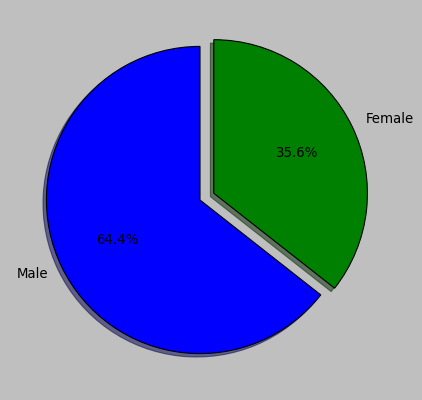

In [11]:
# your code here- 1st way
labels = ['Male', 'Female']
sizes = [64.4,35.6]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

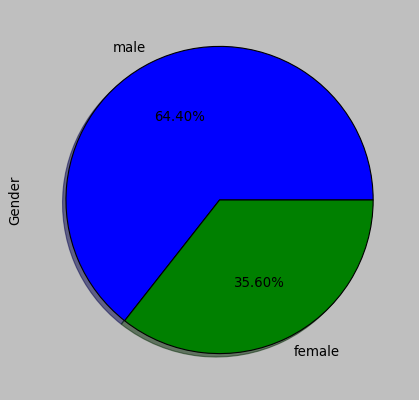

In [12]:
# your code here- 2nd way
titanic.Gender.value_counts().plot.pie(autopct='%.2f%%',shadow=True);

#### Use the appropriate plot to visualize the column `Pclass` 


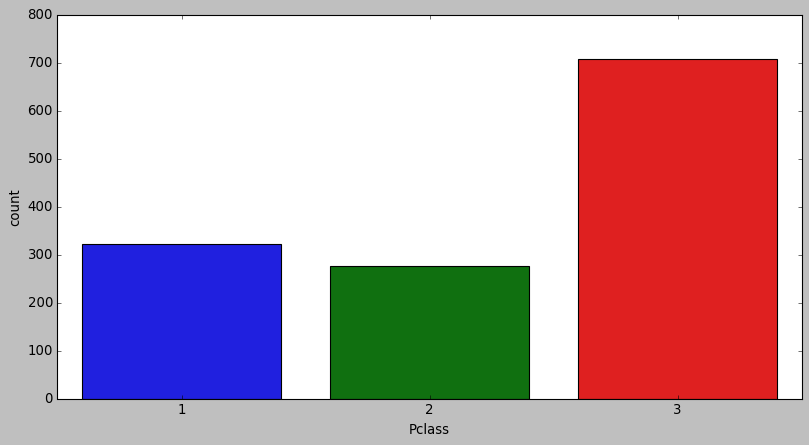

In [13]:
# your code here
sns.countplot(titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

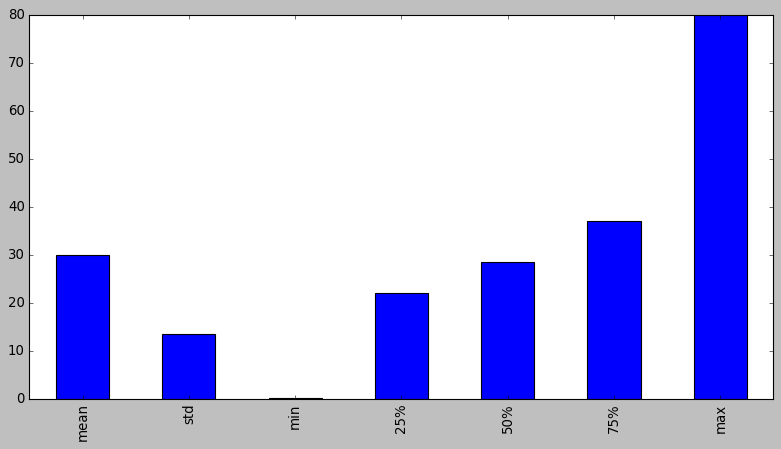

In [14]:
# your code here
titanic.Age.describe()[1:].plot.bar()

#### What does the previous plot tell you about the feature `Age`? Comment.

In [15]:
# your comment here: En promedio las personas tenían 30 años, la persona con mayor edad tenía 80 y la más joven menos de 1 año. El 75% de las personas tenía menos de 40 años.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

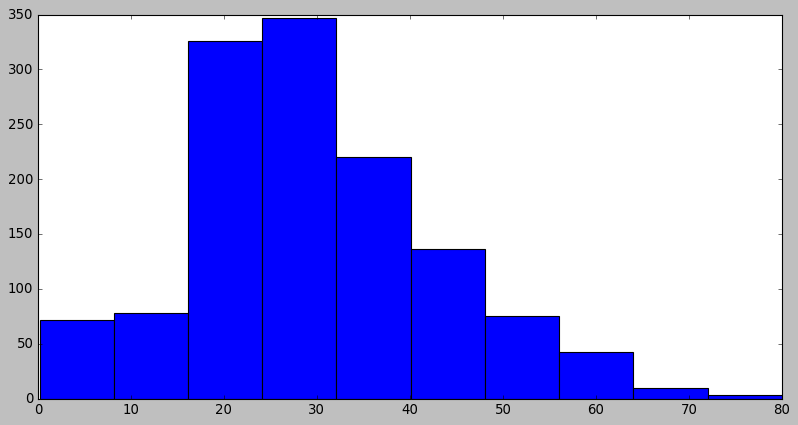

In [16]:
#your code here
plt.hist(titanic['Age'])

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
#your comment here: Que la distribución está más sesgada a la izquierda, es decir, hay más gente con edad menor a la media.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

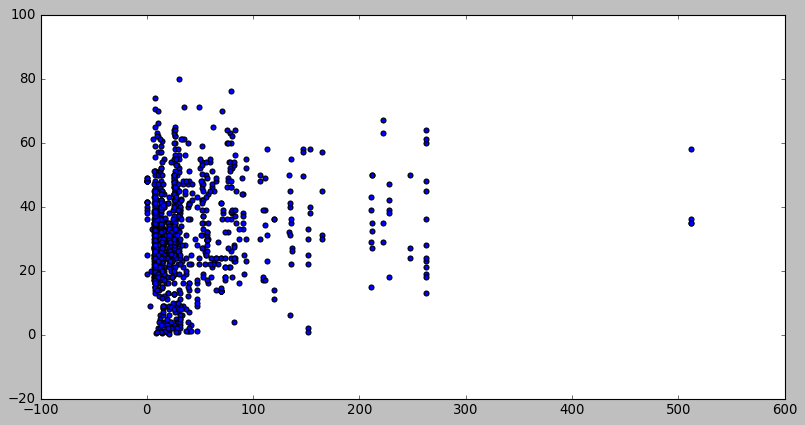

In [18]:
#your code-1st way
plt.scatter(titanic['Fare'],titanic['Age'])

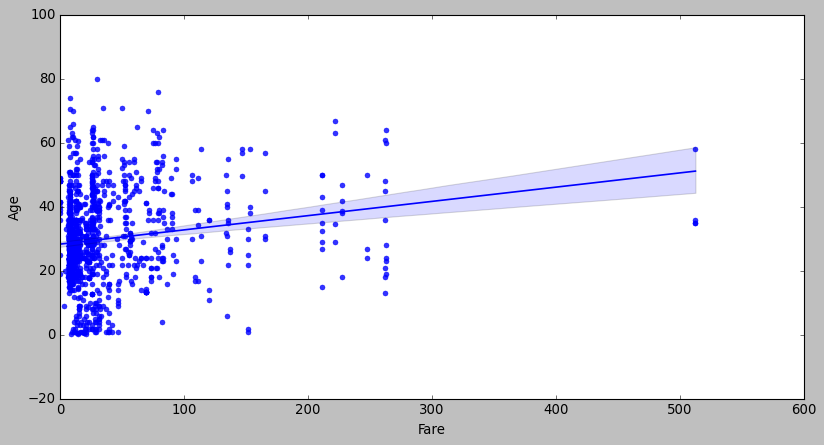

In [19]:
# your code-2nd way
sns.regplot('Fare','Age',titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

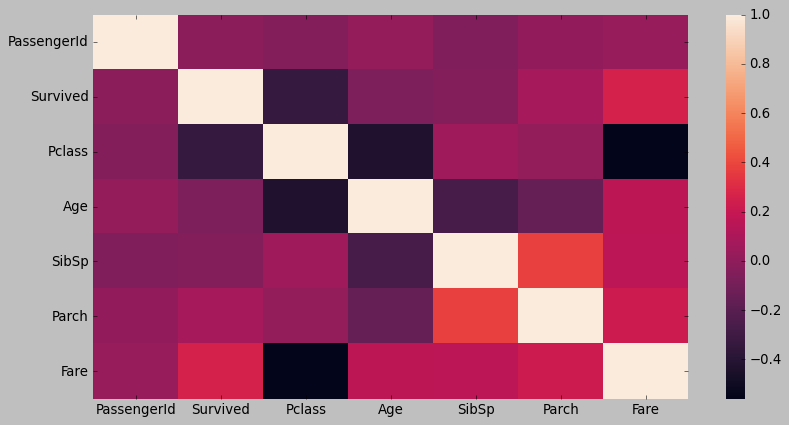

In [20]:
#your code here
sns.heatmap(titanic.corr());

#### According to the previous plot, what are the most correlated feature? Comment.

In [21]:
#your comment here: En donde se ve un color más claro es entre SibSp y Parch.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

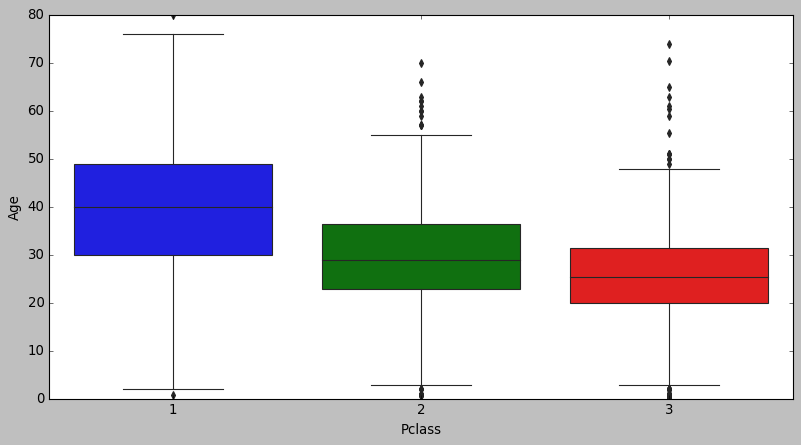

In [22]:
#your code here
sns.boxplot(titanic.Pclass,titanic.Age)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

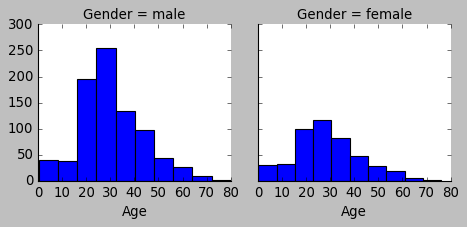

In [24]:
#your code here
genero=sns.FacetGrid(titanic,col='Gender')
graf1 = genero.map(plt.hist, "Age")